In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [2]:
df = pd.read_csv("diabetes_data_new_features.csv")

In [3]:
df

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,muscle stiffness,Obesity,class,Age >= 60
0,1,0,1,0,1,0,0,1,0,1,1,1,0
1,1,0,0,0,1,0,1,0,0,0,0,1,0
2,1,1,0,0,1,1,0,1,0,1,0,1,0
3,1,0,0,1,1,1,0,1,0,0,0,1,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,1,0,0,0,1,0
516,0,1,1,1,1,1,0,1,1,0,0,1,0
517,0,1,1,1,1,1,1,0,0,1,1,1,0
518,0,0,0,0,1,0,1,1,0,0,0,0,0


In [4]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
# Hand-crafted model
model = BayesianNetwork([
    ('Age >= 60', 'class'),
    ('Obesity', 'Age >= 60'),
    ('Polyuria', 'Polydipsia'),
    ('Polydipsia', 'Polyphagia'),
    ('Polyuria', 'class'),
    ('Polydipsia', 'class'),
    ('Polyphagia', 'class'),
    ('sudden weight loss', 'class'),
    ('Gender', 'class'),
    ('visual blurring', 'class'),
    ('Itching', 'class'),
    ('Irritability', 'class'),
    ('muscle stiffness', 'class'),
    ('weakness', 'class')
])

In [6]:
model.fit(train_data, estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model)

In [7]:
predictions = []
for _, row in test_data.iterrows():
    try:
        evidence = row.to_dict()
        actual_outcome = evidence.pop('class', None)
        predicted_outcome = inference.map_query(variables=['class'], evidence=evidence)['class']
        predictions.append((predicted_outcome, actual_outcome))
    except Exception as e:
        print("Error processing row:", row)
        print("Exception:", e)
        break

if predictions:
    correct_predictions = sum(1 for pred, actual in predictions if pred == actual)
    accuracy = correct_predictions / len(predictions)
    print(f'Accuracy: {accuracy:.2f}')
else:
    print("No predictions made.")

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

Accuracy: 0.79


In [8]:
print(classification_report([actual for pred, actual in predictions], [pred for pred, actual in predictions]))

              precision    recall  f1-score   support

           0       0.60      0.97      0.74        33
           1       0.98      0.70      0.82        71

    accuracy                           0.79       104
   macro avg       0.79      0.84      0.78       104
weighted avg       0.86      0.79      0.80       104



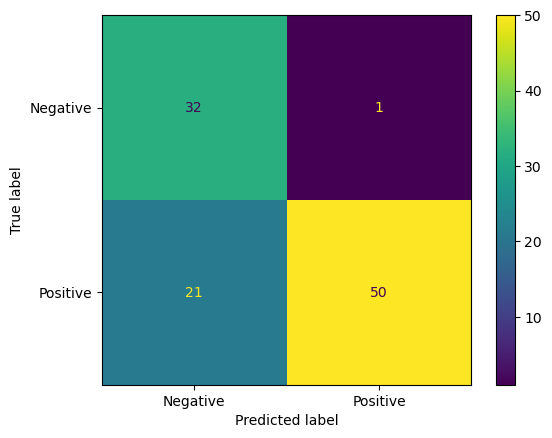

In [9]:
cm = confusion_matrix([actual for pred, actual in predictions], [pred for pred, actual in predictions])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()

In [12]:
actual = np.array([actual for pred, actual in predictions])
preds = np.array([pred for pred, actual in predictions])

In [14]:
fpr, tpr, thresholds = roc_curve(actual, preds)
roc_auc = auc(fpr, tpr)

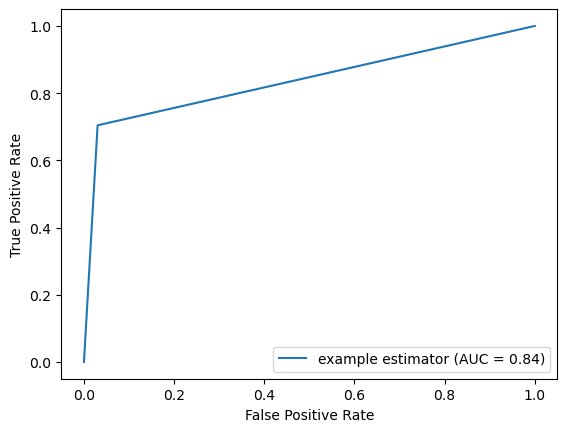

In [19]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Hand-crafted model')
display.plot()
plt.show()